# Market Basket Analysis using Apriori Algorithm

Market Basket Analysis
Market basket analysis scrutinizes the products customers tend to buy together, and uses the information to decide which products should be cross-sold or promoted together. The term arises from the shopping carts supermarket shoppers fill up during a shopping trip.

Association Rule Mining is used when we want to find an association between different objects in a set, find frequent patterns in a transaction database, relational databases or any other information repository.

The most common approach to find these patterns is Market Basket Analysis, which is a key technique used by large retailers like Amazon, Flipkart, etc to analyze customer buying habits by finding associations between the different items that customers place in their “shopping baskets”. The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. The strategies may include:

Changing the store layout according to trends
Customers behavior analysis
Catalog Design
Cross marketing on online stores
Customized emails with add-on sales, etc.
Matrices
Support : Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

Confidence : Likelihood that customer who bought both A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.

Confidence(A => B) = Support(A, B)/Support(A)
Lift : Increase in the sale of A when you sell B.

Lift(A => B) = Confidence(A, B)/Support(B)

Lift (A => B) = 1 means that there is no correlation within the itemset.

Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.

Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Apriori Algorithm: Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

In [1]:
#importing the Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load Dataset
ma = pd.read_csv(r"C:\Users\Baliqees\Desktop\Filt\Dataset\Market Basket Analysis - Groceries_dataset.csv")
ma.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


EDA 

In [3]:
ma.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

There are no missing data in this dataset

In [4]:
#checking for the overview of the data
ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Date is not suppose to be an object, hence it needs to be converted to datetime format

In [5]:
ma['date'] = pd.to_datetime (ma['Date'])
ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
ma.shape

(38765, 4)

The dataset contains 38765 rows and 4 columns

Now lets check for duplicate

In [7]:
ma.duplicated().sum()

759

There are 759 duplicates

Lets drop the duplicates

In [8]:
ma.drop_duplicates(ignore_index=True)

ma= ma.drop_duplicates(ignore_index=True)

ma

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02
...,...,...,...,...
38001,4471,08-10-2014,sliced cheese,2014-08-10
38002,2022,23-02-2014,candy,2014-02-23
38003,1097,16-04-2014,cake bar,2014-04-16
38004,1510,03-12-2014,fruit/vegetable juice,2014-03-12


In [9]:
ma.shape

(38006, 4)

After dropping the duplicate, we have 38006 rows left

In [10]:
ma.describe()

,Member_number
count,38006.000000
mean,3003.361390
std,1153.659151
min,1000.000000
25%,2001.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [11]:
ma["Member_number"].value_counts()

3180    35
3737    33
3050    32
2051    31
3915    30
        ..
4816     1
4029     1
4151     1
4565     1
2640     1
Name: Member_number, Length: 3898, dtype: int64

Judging from the value counts, customer with the member number 3180 is a customer to keep, he/she has the highest returning rate

# Visualizing the Top Customers

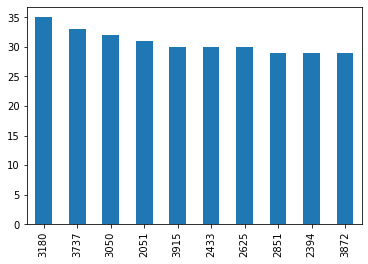

In [12]:
ma["Member_number"].value_counts().iloc[:10].plot(kind="bar")
plt.show()

These are the top 10 customers

In [13]:
ma["itemDescription"].value_counts()

whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

whole milk, other vegetables, rolls/buns..... are the best selling items

 # Visualizing the Best Selling Items

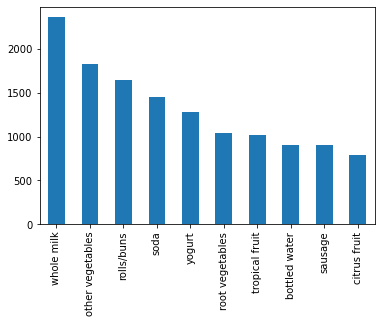

In [14]:
ma["itemDescription"].value_counts().iloc[:10].plot(kind="bar")
plt.show()

These are the top 10 best selling items

 # Visualizing the least Selling Items

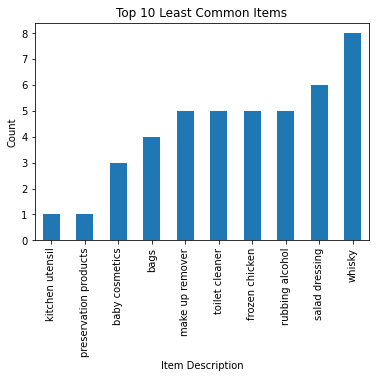

In [27]:
item_counts = ma["itemDescription"].value_counts().nsmallest(10)
item_counts.plot(kind="bar")
plt.xlabel("Item Description")
plt.ylabel("Count")
plt.title("Top 10 Least Common Items")
plt.show()

These are the least selling items

In [17]:
#Since date is already in datetime format, let's extract month and year from it
ma['Month'] = ma['date'].dt.to_period('M')
#Let's group by month to count the item sold
items_sold_by_month = ma.groupby('Month')['itemDescription'].count().reset_index()

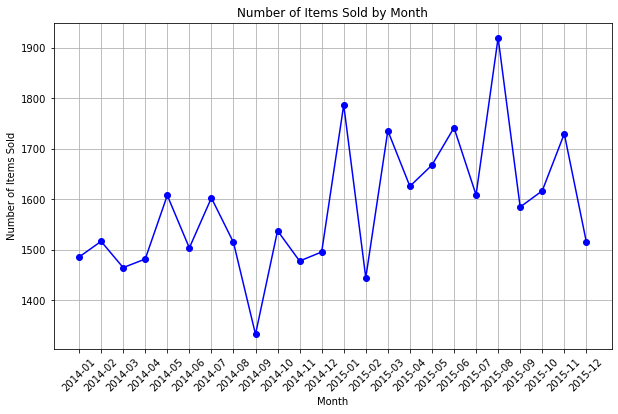

In [18]:
# Convert the 'Month' column to string
items_sold_by_month['Month'] = items_sold_by_month['Month'].astype(str)
# Plotting the number of items sold by month
plt.figure(figsize=(10, 6))
plt.plot(items_sold_by_month['Month'], items_sold_by_month['itemDescription'], marker='o', linestyle='-', color='b')
plt.title('Number of Items Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The month with the highest sales is August 2015, while the lowest is September 2014.I also notice a drop in September 2015.

In [19]:


# Count the number of items bought by each customer
items_bought_by_customer= ma.groupby('Member_number')['itemDescription'].count().reset_index()

# Sort the customers by the number of items bought (descending order)
Customers_Level = items_bought_by_customer.sort_values(by='itemDescription', ascending=False)

print(Customers_Level)

      Member_number  itemDescription
2120           3180               35
2665           3737               33
1994           3050               32
1026           2051               31
1388           2433               30
...             ...              ...
3067           4151                1
3468           4565                1
1590           2640                1
3715           4816                1
1666           2717                1

[3898 rows x 2 columns]


In [20]:
ma['single_transaction'] = ma['Member_number'].astype(str) + '_' + ma['Date'].astype(str)

ma.tail()

,Member_number,Date,itemDescription,date,Month,single_transaction
38001,4471,08-10-2014,sliced cheese,2014-08-10,2014-08,4471_08-10-2014
38002,2022,23-02-2014,candy,2014-02-23,2014-02,2022_23-02-2014
38003,1097,16-04-2014,cake bar,2014-04-16,2014-04,1097_16-04-2014
38004,1510,03-12-2014,fruit/vegetable juice,2014-03-12,2014-03,1510_03-12-2014
38005,1521,26-12-2014,cat food,2014-12-26,2014-12,1521_26-12-2014


The “single_transaction” variable combines the member number, and date, and tells us the item purchased in one receipt.

#Now, let’s pivot this table to convert the items into columns and the transaction into rows:

In [21]:
ma2 = pd.crosstab(ma['single_transaction'], ma['itemDescription'])
ma2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999_26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The resulting table tells us how many times each item has been purchased in one transaction:

There are over a hundred columns while most people only shop for 2-3 items, which is why this table is sparse and mostly comprised of zeroes.

The final data pre-processing step involves encoding all values in the above data frame to 0 and 1.

This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

In [22]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = ma2.applymap(encode)

Installing mlxtend

In [23]:
pip install mlxtend  

# Build the Apriori Algorithm for Market Basket Analysis

In [46]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

C:\Users\Baliqees\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


from the table above, the “antecedents” and “consequents” columns shows items that are frequently purchased together.
For example, first row of the dataset tells us that if a person were to buy bottled water, then they are also likely to purchase UHT-milk.

To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift:

In [42]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


The resulting table shows that the four most popular product combinations that are frequently bought together are:

Rolls and milk

Yogurt and milk

Sausages and milk

Soda and vegetables

from the above, Rolls, Milk, Yogurt, Sausages etc should be place close to one another, inorder to increase sales/Profit

# Conclusion
We successfully implemented market basket analysis on a retail dataset using the apriori algorithm and association rules. The great part of this process is that it is relatively easy to implement and interpret, the result of which can be used to make data-driven, strategic marketing decisions. 